# 最尤推定量

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# 確率密度関数 平均11/12, 分散11/13-(11/12)^2
def f(x):
    return 11 * (x ** 10)
mu = 11 / 12
sigma2 = 11 / 13 - (11 / 12) ** 2
# 累積分布関数
def F(x):
    return x ** 11
# 累積分布関数の逆関数
def F_inv(x):
    return x ** (1 / 11)

### 最尤推定量
確率分布を、f(x) = (theta + 1) * (x ^ theta)とする。
真のthetaは10、thetaの最尤推定量は、- n / sum(np.log(x)) - 1
フィッシャー情報量は、n / 11 ** 2

### n = 1

(0.0, 0.1)

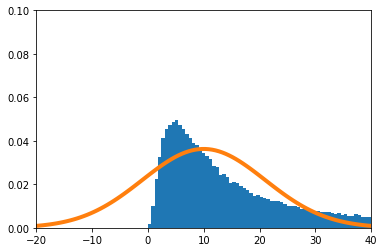

In [3]:
n = 1
theta_min = -20
theta_max = 40
theta = []
for _ in range(100000):
    x = F_inv(np.random.rand(n))
    theta.append(- n / sum(np.log(x)) - 1)
theta = np.array(theta)
th = np.linspace(theta_min, theta_max, 100)
hi = np.array([np.sum(np.logical_and(th[i] < theta, theta <= th[i + 1])) for i in range(100 - 1)]) / (len(theta) * (th[1] - th[0]))
plt.bar((th[:-1] + th[1:]) / 2, hi, width=(th[1] - th[0]))
s = np.linspace(theta_min, theta_max, 100)
plt.plot(s, norm.pdf(s, 10, (11 ** 2 / n) ** 0.5), 'tab:orange', linewidth=4)
plt.xlim(theta_min, theta_max)
plt.ylim(0.0, 0.1)

### n = 10

(0.0, 0.2)

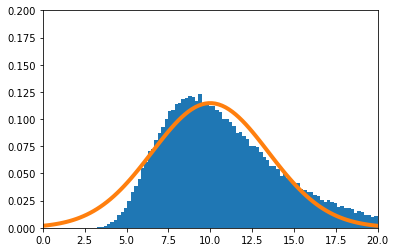

In [4]:
n = 10
theta_min = 0
theta_max = 20
theta = []
for _ in range(100000):
    x = F_inv(np.random.rand(n))
    theta.append(- n / sum(np.log(x)) - 1)
theta = np.array(theta)
th = np.linspace(theta_min, theta_max, 100)
hi = np.array([np.sum(np.logical_and(th[i] < theta, theta <= th[i + 1])) for i in range(100 - 1)]) / (len(theta) * (th[1] - th[0]))
plt.bar((th[:-1] + th[1:]) / 2, hi, width=(th[1] - th[0]))
s = np.linspace(theta_min, theta_max, 100)
plt.plot(s, norm.pdf(s, 10, (11 ** 2 / n) ** 0.5), 'tab:orange', linewidth=4)
plt.xlim(theta_min, theta_max)
plt.ylim(0.0, 0.2)

### n = 100

(0.0, 0.5)

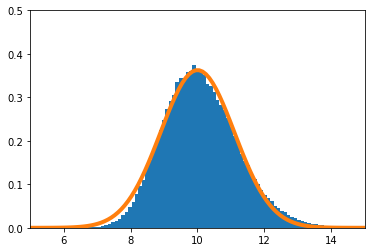

In [5]:
n = 100
theta_min = 5
theta_max = 15
theta = []
for _ in range(100000):
    x = F_inv(np.random.rand(n))
    theta.append(- n / sum(np.log(x)) - 1)
theta = np.array(theta)
th = np.linspace(theta_min, theta_max, 100)
hi = np.array([np.sum(np.logical_and(th[i] < theta, theta <= th[i + 1])) for i in range(100 - 1)]) / (len(theta) * (th[1] - th[0]))
plt.bar((th[:-1] + th[1:]) / 2, hi, width=(th[1] - th[0]))
s = np.linspace(theta_min, theta_max, 100)
plt.plot(s, norm.pdf(s, 10, (11 ** 2 / n) ** 0.5), 'tab:orange', linewidth=4)
plt.xlim(theta_min, theta_max)
plt.ylim(0.0, 0.5)

# デルタ法
最尤推定量の逆関数 `1 / (- n / sum(np.log(x)) - 1)`は、平均 `1 / theta`、分散 `(11 ** 2 / n) / 10 ** 4` の正規分布に従う

### n = 1

(-0.2, 0.6)

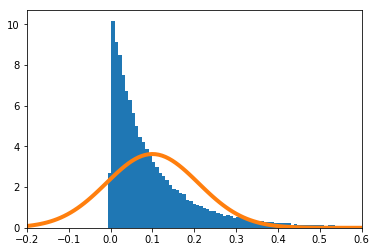

In [6]:
n = 1
theta_min = -0.2
theta_max = 0.6
theta = []
for _ in range(100000):
    x = F_inv(np.random.rand(n))
    theta.append(1 / (- n / sum(np.log(x)) - 1))
theta = np.array(theta)
th = np.linspace(theta_min, theta_max, 100)
hi = np.array([np.sum(np.logical_and(th[i] < theta, theta <= th[i + 1])) for i in range(100 - 1)]) / (len(theta) * (th[1] - th[0]))
plt.bar((th[:-1] + th[1:]) / 2, hi, width=(th[1] - th[0]))
s = np.linspace(theta_min, theta_max, 100)
plt.plot(s, norm.pdf(s, 1/10, (11 ** 2 / n / 10 ** 4) ** 0.5), 'tab:orange', linewidth=4)
plt.xlim(theta_min, theta_max)

### n = 10

(0, 0.2)

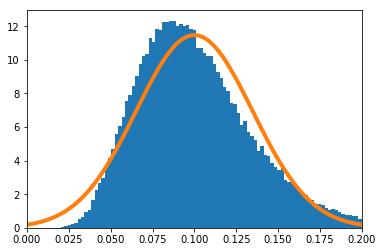

In [7]:
n = 10
theta_min = 0
theta_max = 0.2
theta = []
for _ in range(100000):
    x = F_inv(np.random.rand(n))
    theta.append(1 / (- n / sum(np.log(x)) - 1))
theta = np.array(theta)
th = np.linspace(theta_min, theta_max, 100)
hi = np.array([np.sum(np.logical_and(th[i] < theta, theta <= th[i + 1])) for i in range(100 - 1)]) / (len(theta) * (th[1] - th[0]))
plt.bar((th[:-1] + th[1:]) / 2, hi, width=(th[1] - th[0]))
s = np.linspace(theta_min, theta_max, 100)
plt.plot(s, norm.pdf(s, 1/10, (11 ** 2 / n / 10 ** 4) ** 0.5), 'tab:orange', linewidth=4)
plt.xlim(theta_min, theta_max)

### n = 100

(0.05, 0.15)

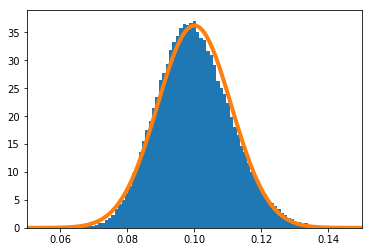

In [8]:
n = 100
theta_min = 0.05
theta_max = 0.15
theta = []
for _ in range(100000):
    x = F_inv(np.random.rand(n))
    theta.append(1 / (- n / sum(np.log(x)) - 1))
theta = np.array(theta)
th = np.linspace(theta_min, theta_max, 100)
hi = np.array([np.sum(np.logical_and(th[i] < theta, theta <= th[i + 1])) for i in range(100 - 1)]) / (len(theta) * (th[1] - th[0]))
plt.bar((th[:-1] + th[1:]) / 2, hi, width=(th[1] - th[0]))
s = np.linspace(theta_min, theta_max, 100)
plt.plot(s, norm.pdf(s, 1/10, (11 ** 2 / n / 10 ** 4) ** 0.5), 'tab:orange', linewidth=4)
plt.xlim(theta_min, theta_max)